<a href="https://colab.research.google.com/github/Ayush807/IBP_Assignment_2023/blob/main/IBP_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading Enron Email Data



### Full/Complete Dataset

The following code-cell will download the complete Enron email database to the Colab instance.  It will take about 1-2 mins to download.

In [1]:
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2023-05-25 04:49:08--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2023-05-25 04:49:10--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  56.1MB/s    in 19s     

2023-05-25 04:49:29 (43.

In [2]:
#import module for connection to database
import sqlite3

In [65]:
#establish connection with database
conn = sqlite3.connect("enron.db")

In [4]:
#create cursor object
cur = conn.cursor()

In [5]:
#check schema of database
sql = """
SELECT name 
FROM sqlite_master
WHERE type = "table";
"""
cur.execute(sql)
cur.fetchall()

[('employeelist',), ('message',), ('recipientinfo',), ('referenceinfo',)]

In [6]:
#check schema of table users using PRAGMA
sql = """
PRAGMA table_info('employeelist');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'eid', 'INTEGER', 1, None, 1),
 (1, 'firstName', 'VARCHAR(31)', 1, "''", 0),
 (2, 'lastName', 'VARCHAR(31)', 1, "''", 0),
 (3, 'Email_id', 'VARCHAR(31)', 1, "''", 0),
 (4, 'Email2', 'VARCHAR(31)', 0, None, 0),
 (5, 'Email3', 'VARCHAR(31)', 0, None, 0),
 (6, 'EMail4', 'VARCHAR(31)', 0, None, 0),
 (7, 'folder', 'VARCHAR(31)', 1, "''", 0),
 (8, 'status', 'VARCHAR(50)', 0, None, 0)]

In [7]:
#check schema of table users using PRAGMA
sql = """
PRAGMA table_info('message');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'mid', 'INTEGER', 1, "'0'", 1),
 (1, 'sender', 'VARCHAR(127)', 1, "''", 0),
 (2, 'date', 'DATETIME', 0, None, 0),
 (3, 'message_id', 'VARCHAR(127)', 0, None, 0),
 (4, 'subject', 'TEXT', 0, None, 0),
 (5, 'body', 'TEXT', 0, None, 0),
 (6, 'folder', 'VARCHAR(127)', 1, "''", 0)]

In [8]:
#check schema of table users using PRAGMA
sql = """
PRAGMA table_info('recipientinfo');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'rid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'rtype', 'TEXT', 0, None, 0),
 (3, 'rvalue', 'VARCHAR(127)', 0, None, 0),
 (4, 'dater', 'DATETIME', 0, None, 0)]

In [9]:
#check schema of table users using PRAGMA
sql = """
PRAGMA table_info('referenceinfo');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'rfid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'reference', 'TEXT', 0, None, 0)]

In [10]:
#Checking format of date field
sql = """
SELECT date
FROM message
"""

cur.execute(sql)
row = cur.fetchone()

print(row)

('2000-01-21 04:51:00',)


In [40]:
#using pandas library to read database
import pandas as pd

sql='''
SELECT * from message;
'''
# Load the data into a DataFrame
message_df = pd.read_sql_query(sql, conn)
message_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252759 entries, 0 to 252758
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   mid         252759 non-null  int64 
 1   sender      252759 non-null  object
 2   date        252759 non-null  object
 3   message_id  252759 non-null  object
 4   subject     252759 non-null  object
 5   body        252759 non-null  object
 6   folder      252759 non-null  object
dtypes: int64(1), object(6)
memory usage: 13.5+ MB


In [12]:
#checking the number of columns with missing values
message_df.isnull().sum()

mid           0
sender        0
date          0
message_id    0
subject       0
body          0
folder        0
dtype: int64

In [41]:
#sql = """
 #   SELECT DATE(date) AS Email_Date, Count(*) AS email_count
  #  FROM Message
   # GROUP BY email_date
    #ORDER BY email_date
#"""

#email_count = cur.fetchall()
#email_count = pd.read_sql_query(sql, conn)
#email_count

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

email_date = """
    SELECT strftime('%Y-%m-%d', date) AS Email_Date, COUNT(*) AS Email_Count
    FROM Message
    GROUP BY Email_Date
"""
email_count_df = pd.read_sql_query(email_date, conn)
email_count_df

,Email_Date,Email_Count
0,0001-05-30,2
1,0001-06-18,1
2,0001-07-24,1
3,0001-08-01,1
4,0001-08-06,1
...,...,...
1318,2020-12-24,1
1319,2020-12-29,1
1320,2043-12-28,1
1321,2044-01-02,1


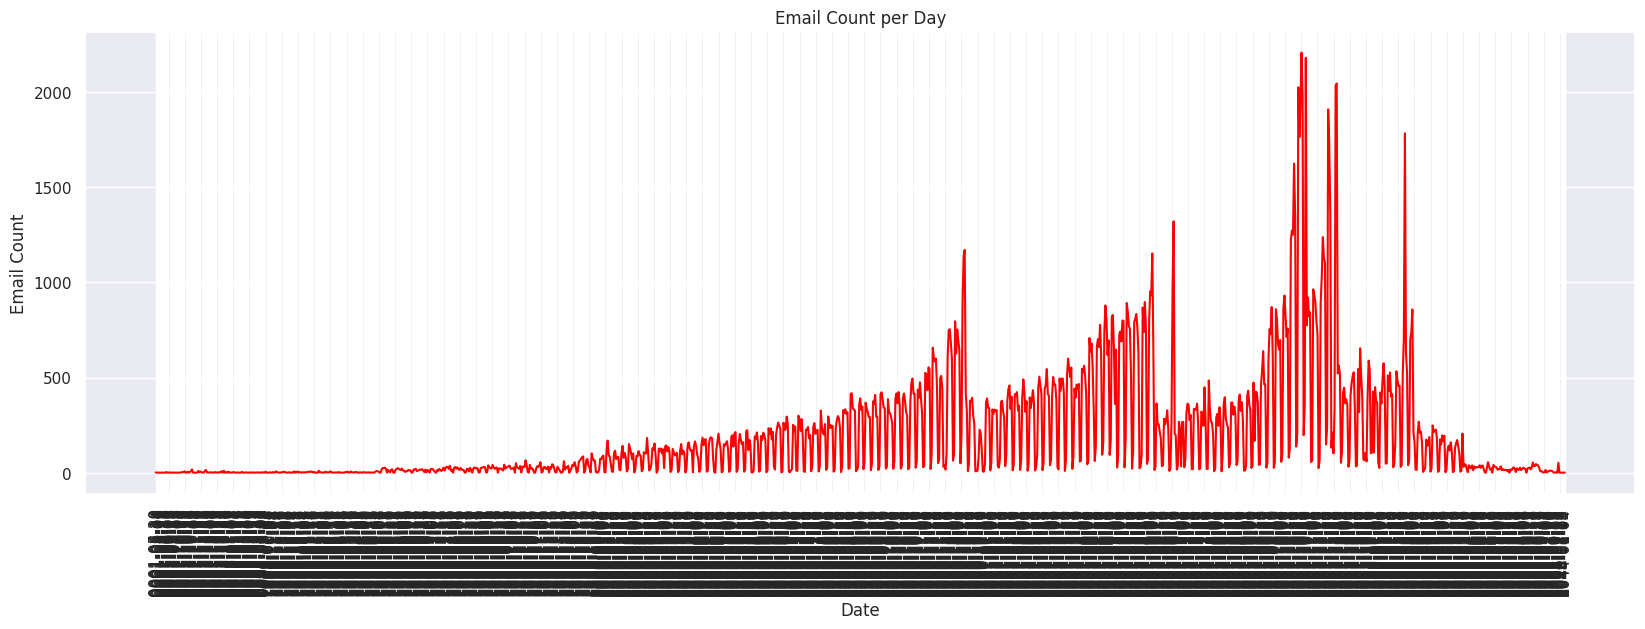

In [133]:
import numpy as np
plt.figure(figsize=(20, 6))
sns.lineplot(x='Email_Date', y='Email_Count', data=email_count_df,color='red')
plt.title('Email Count per Day')
plt.xlabel('Date')
plt.ylabel('Email Count')
plt.xticks(rotation=90)
plt.show()

In [16]:
#check schema of table users using PRAGMA
sql = """
PRAGMA table_info('recipientinfo');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'rid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'rtype', 'TEXT', 0, None, 0),
 (3, 'rvalue', 'VARCHAR(127)', 0, None, 0),
 (4, 'dater', 'DATETIME', 0, None, 0)]

In [17]:
sql='''
SELECT * from recipientinfo;
'''
# Load the data into a DataFrame
recipient_df = pd.read_sql_query(sql, conn)
recipient_df

,rid,mid,rtype,rvalue,dater
0,67,52,TO,all.worldwide@enron.com,None
1,68,53,TO,all.downtown@enron.com,None
2,69,54,TO,all.enron-worldwide@enron.com,None
3,70,55,TO,all.worldwide@enron.com,None
4,71,56,TO,all_enron_north.america@enron.com,None
...,...,...,...,...,...
2064437,3242059,404927,BCC,john.anderson@enron.com,None
2064438,3242060,404927,BCC,mark.guzman@enron.com,None
2064439,3242061,404927,BCC,michael.mier@enron.com,None
2064440,3242062,404927,BCC,pete.davis@enron.com,None


In [53]:
sender_query = """
    SELECT Sender, COUNT(*) AS Send_Count
    FROM Message
    GROUP BY Sender
    ORDER BY Send_Count DESC
    LIMIT 10
"""
sender_data = pd.read_sql_query(sender_query, conn)

recipient_query = """
    SELECT rvalue, COUNT(*) AS recipient_count
    FROM recipientinfo
    GROUP BY rvalue
    ORDER BY recipient_count DESC
    LIMIT 10
"""

# Execute the recipient query and fetch the results into a DataFrame
recipient_data = pd.read_sql_query(recipient_query, conn)




In [54]:
sender_data

,sender,Send_Count
0,jeff.dasovich@enron.com,6273
1,j.kaminski@enron.com,5838
2,kay.mann@enron.com,5100
3,sara.shackleton@enron.com,4797
4,tana.jones@enron.com,4437
5,chris.germany@enron.com,3686
6,no.address@enron.com,3511
7,enron.announcements@enron.com,2838
8,matthew.lenhart@enron.com,2784
9,debra.perlingiere@enron.com,2549


In [55]:
recipient_data

,rvalue,recipient_count
0,no.address@enron.com,19198
1,jeff.dasovich@enron.com,11137
2,richard.shapiro@enron.com,11015
3,steven.j.kean@enron.com,10873
4,james.d.steffes@enron.com,10615
5,tana.jones@enron.com,9781
6,sara.shackleton@enron.com,9633
7,mark.e.taylor@enron.com,9090
8,louise.kitchen@enron.com,7603
9,pete.davis@enron.com,7509


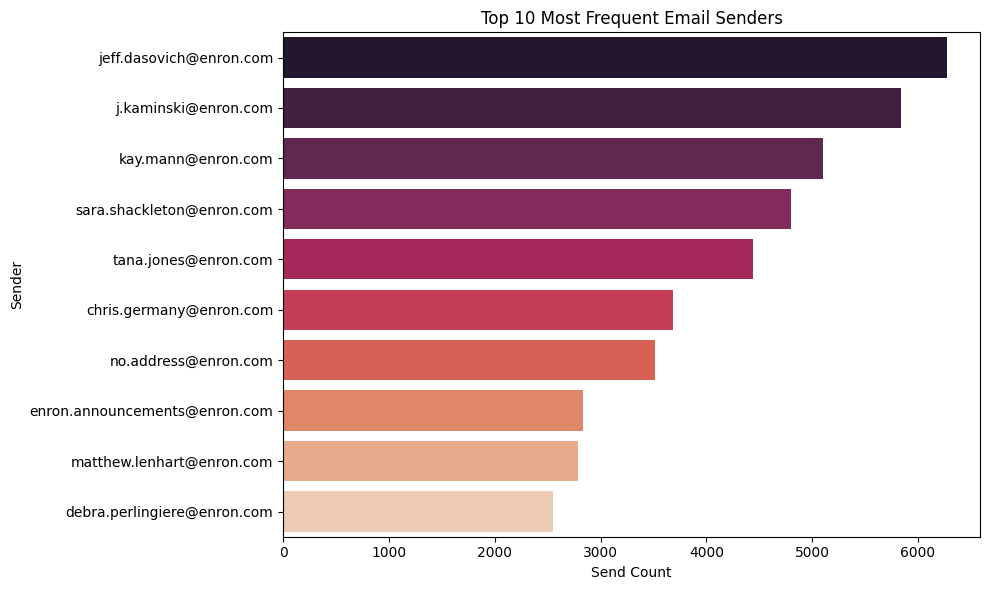

In [109]:
# Plotting horizontal bar chart for top 10 senders
import matplotlib.colors as mcolors
n_colors = 10
color_palette = sns.color_palette("rocket", n_colors)
plt.figure(figsize=(10, 6))
sns.barplot(data=sender_data, y='sender', x='Send_Count', palette=color_palette)
plt.xlabel('Send Count')
plt.ylabel('Sender')
plt.title('Top 10 Most Frequent Email Senders')
plt.tight_layout()
plt.show()

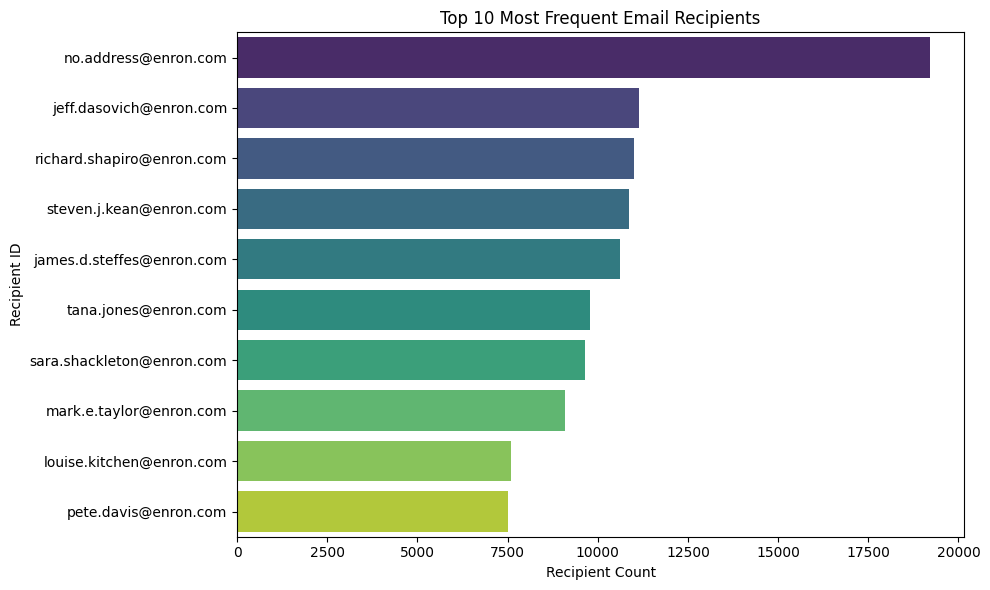

In [111]:
# Plotting horizontal bar chart for top 10 recipients
n_colors = 10
color_palette = sns.color_palette("viridis", n_colors)
plt.figure(figsize=(10, 6))
sns.barplot(data=recipient_data, y='rvalue', x='recipient_count', palette= color_palette)
plt.xlabel('Recipient Count')
plt.ylabel('Recipient ID')
plt.title('Top 10 Most Frequent Email Recipients')
plt.tight_layout()
plt.show()


In [23]:
#Order the rtype values againt the count
type_query = """
    SELECT rtype, COUNT(*) AS Type_Count
    FROM recipientinfo
    GROUP BY rtype
    ORDER BY Type_Count DESC
"""
type_data = pd.read_sql_query(type_query, conn)
type_data

,rtype,Type_Count
0,TO,1556994
1,CC,253735
2,BCC,253713


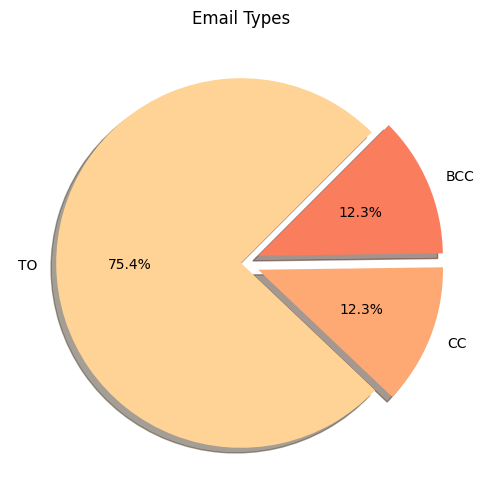

In [108]:
# Plot the pie chart
n_colors = 10
color_palette = sns.color_palette("magma_r", n_colors)
plt.figure(figsize=(8, 6))
plt.pie(data=type_data, x='Type_Count', labels='rtype',autopct='%.1f%%', colors= sns.color_palette(color_palette),explode = (0, 0.1, 0.1),shadow=True,startangle=45)
plt.title('Email Types')

# Show the plot
plt.show()

In [66]:
conn.commit()
conn.close()